In [2]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_motion = pd.read_csv('clustering_columns.csv')

In [6]:
df_motion.head()

,shiftSinceLineset,motionSinceLineset,snap_motion_gap,init_rel_y_dis,end_rel_y_dis,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc
0,0,1,24,173,-1396,1569,-182,-107,-75,337.021739,46,-1397.0
1,0,1,0,983,201,782,-244,-649,405,346.214286,42,984.0
2,0,1,0,2,-320,322,-475,-256,-219,234.441176,34,-532.0
3,0,1,43,554,613,-59,-221,-146,-75,142.200000,5,614.0
4,0,1,0,556,-344,900,-195,-275,80,412.727273,22,-344.0


In [8]:
# #get dummy variables for non-numeric columns

# df_motion = pd.get_dummies(df_motion, columns=['position'], drop_first=False, dtype='int')

In [10]:
from sklearn.preprocessing import StandardScaler

#standardize the variables before conducting PCA
scaler = StandardScaler()
scaler.fit(df_motion)
df_motion_scaled = scaler.transform(df_motion)

In [72]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [74]:
pca.fit(df_motion_scaled)

PCA(n_components=4)

In [76]:
x_pca = pca.transform(df_motion_scaled)

In [78]:
df_motion_scaled.shape

(5631, 12)

In [80]:
x_pca.shape

(5631, 4)

In [82]:
# Perform PCA (already done in your code)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Explained:", np.sum(explained_variance))

Explained Variance Ratio: [0.24305107 0.22660877 0.15788967 0.11055371]
Total Variance Explained: 0.7381032303172845


C:\Users\etien\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\etien\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\etien\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\etien\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\etien\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

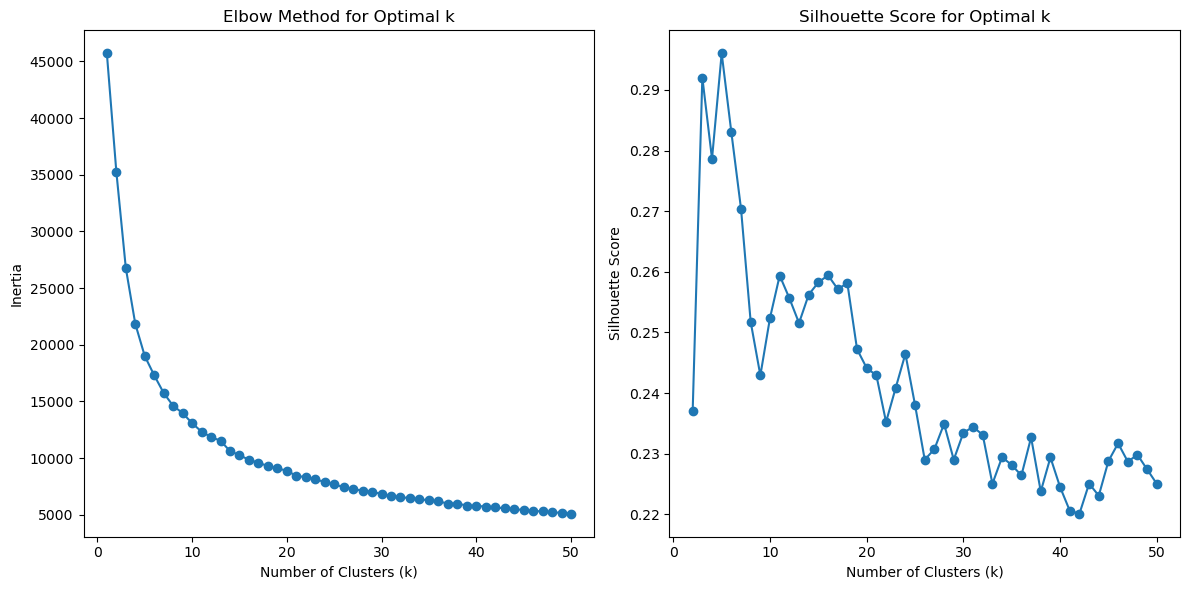

In [84]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of k values to try
k_range = range(1, 51)  # Trying k values from 1 to 10

# For storing inertia and silhouette scores
inertia = []
sil_scores = []

# Loop through each value of k
for k in k_range:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_pca)  # Use your PCA-transformed data (x_pca)

    # Compute inertia for Elbow Method
    inertia.append(kmeans.inertia_)

    # Compute silhouette score
    if k > 1:  # Silhouette score is only defined for k > 1
        sil_score = silhouette_score(x_pca, labels)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(-1)  # For k=1, silhouette score is undefined

# Plot the Elbow Method (Inertia vs. k)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot the Silhouette Scores (Silhouette Score vs. k)
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], sil_scores[1:], marker='o')  # Skip the first value (k=1)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()


In [86]:
#use n=18 based on this
kmeans = KMeans(n_clusters=18, random_state=42)  # Adjust clusters as needed
labels = kmeans.fit_predict(x_pca)

C:\Users\etien\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=22.
  warnings.warn(


In [88]:
kmeans.labels_

array([11, 14,  1, ..., 13, 15,  3])

In [90]:
#set labels as a column in original df

In [92]:
df_player_play_motion = pd.read_csv('df_player_play_motion.csv')

In [94]:
df_player_play_motion['motion_label'] = kmeans.labels_

In [96]:
df_player_play_motion.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,end_rel_y_dis,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_flipped,motion_label
0,2022090800,56,42489,BUF,0,0,0,0,0,1,...,-1396,1569,-182,-107,-75,337.021739,46,-1397.0,0,11
1,2022090800,80,47857,BUF,0,0,0,0,0,0,...,201,782,-244,-649,405,346.214286,42,984.0,1,14
2,2022090800,101,53079,BUF,0,0,0,0,0,0,...,-320,322,-475,-256,-219,234.441176,34,-532.0,1,1
3,2022090800,191,53079,BUF,0,0,0,0,0,0,...,613,-59,-221,-146,-75,142.200000,5,614.0,1,12
4,2022090800,212,47879,BUF,0,0,0,0,0,0,...,-344,900,-195,-275,80,412.727273,22,-344.0,0,15


In [98]:
# Create a dictionary to hold DataFrames for each unique motion_label
motion_label_dfs = {label: df_player_play_motion[df_player_play_motion['motion_label'] == label] 
                     for label in df_player_play_motion['motion_label'].unique()}

In [102]:
# Get the row size of every DataFrame in motion_label_dfs
row_sizes = {label: df.shape[0] for label, df in motion_label_dfs.items()}
# Print the row sizes in numerical order, one per line
for label, size in sorted(row_sizes.items(), key=lambda item: item[1]):
    print(f'Motion Label: {label}, Row Size: {size}')

##CHECK THE MOTIONS WITH ONLY 2 IN THE GROUP, LIKELY OUTLIERS THAT CAN BE CUT

Motion Label: 17, Row Size: 2
Motion Label: 0, Row Size: 82
Motion Label: 14, Row Size: 166
Motion Label: 10, Row Size: 176
Motion Label: 7, Row Size: 177
Motion Label: 13, Row Size: 193
Motion Label: 8, Row Size: 208
Motion Label: 4, Row Size: 225
Motion Label: 1, Row Size: 275
Motion Label: 6, Row Size: 285
Motion Label: 16, Row Size: 298
Motion Label: 11, Row Size: 305
Motion Label: 9, Row Size: 394
Motion Label: 12, Row Size: 528
Motion Label: 2, Row Size: 550
Motion Label: 15, Row Size: 567
Motion Label: 5, Row Size: 584
Motion Label: 3, Row Size: 616


In [108]:
#example
motion_label_dfs[14][:10]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,end_rel_y_dis,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_flipped,motion_label
1,2022090800,80,47857,BUF,0,0,0,0,0,0,...,201,782,-244,-649,405,346.214286,42,984.0,1,14
12,2022090800,393,47853,LA,1,1,0,0,0,0,...,-213,1765,-121,-541,420,368.480000,50,-214.0,1,14
21,2022090800,818,47853,LA,0,0,0,0,0,1,...,-176,1147,-182,-646,464,488.769231,26,972.0,1,14
84,2022091100,190,39975,ATL,0,0,0,0,0,0,...,-726,998,-490,-716,226,466.954545,22,273.0,1,14
87,2022091100,212,54473,ATL,0,0,0,0,0,0,...,196,1080,-216,-472,256,467.500000,24,1271.0,0,14
131,2022091100,1672,54473,ATL,0,0,0,0,0,0,...,148,953,-192,-527,335,469.863636,22,1104.0,0,14
175,2022091100,3926,54473,ATL,0,0,0,0,0,0,...,35,1031,-160,-458,298,485.869565,23,1055.0,1,14
181,2022091101,184,44898,CLE,0,0,0,0,0,0,...,95,980,-149,-624,475,398.229167,48,1076.0,1,14
206,2022091101,1192,44898,CLE,0,0,0,0,0,0,...,-88,1311,-180,-737,557,399.337838,74,1221.0,0,14
285,2022091102,574,47819,SF,1,3,0,0,0,0,...,17,829,-211,-851,640,273.763158,38,17.0,0,14


Observations on the results
- Doesn't seem to care if a player runs back and forth, for example: [2022091100, 166]
- Might be useful to add distance from QB to this (distinguish between starting in backfield, lined up outside etc.) Tried to do with line but maybe didn't work great

In [208]:
df_player_play_motion[(df_player_play_motion['gameId'] == 2022091100) & (df_player_play_motion['playId'] == 166)]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,max_y_rel_pos,min_y_rel_pos,y_flipped,dis_line_start,dis_line_end,max_dist_fb,min_dist_fb,passed_fb,position,motion_label
48,2022091100,166,48374,ATL,0,0,0,0,0,0,...,0,1607,1,665,-209,662,-942,0,WR,14


In [210]:
#Export labels for every motion
df_player_play_motion.to_csv('player_play_motion_labels.csv',index=False)

#Create a short description for all 20 categories for the reader